In [ ]:
from utils.util import *
import plotly.express as px

real_data_1000_genome = load_real_data(hapt_genotypes_path=f"../{REAL_10K_SNP_1000G_PATH}",
                                       extra_data_path=f"../{REAL_EXTRA_DATA_PATH}")
real_data_1000_genome

In [2]:
sns.set(style="whitegrid", rc={"figure.figsize": (20, 10)})


def plot_number_of_samples(target_column_name: str):
    ax = sns.countplot(x=target_column_name, data=real_data_1000_genome)
    plt.xlabel(target_column_name)
    plt.ylabel("Number of Samples")
    plt.title("Number of Samples by " + target_column_name)

    # Add count values to the plot
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.show()

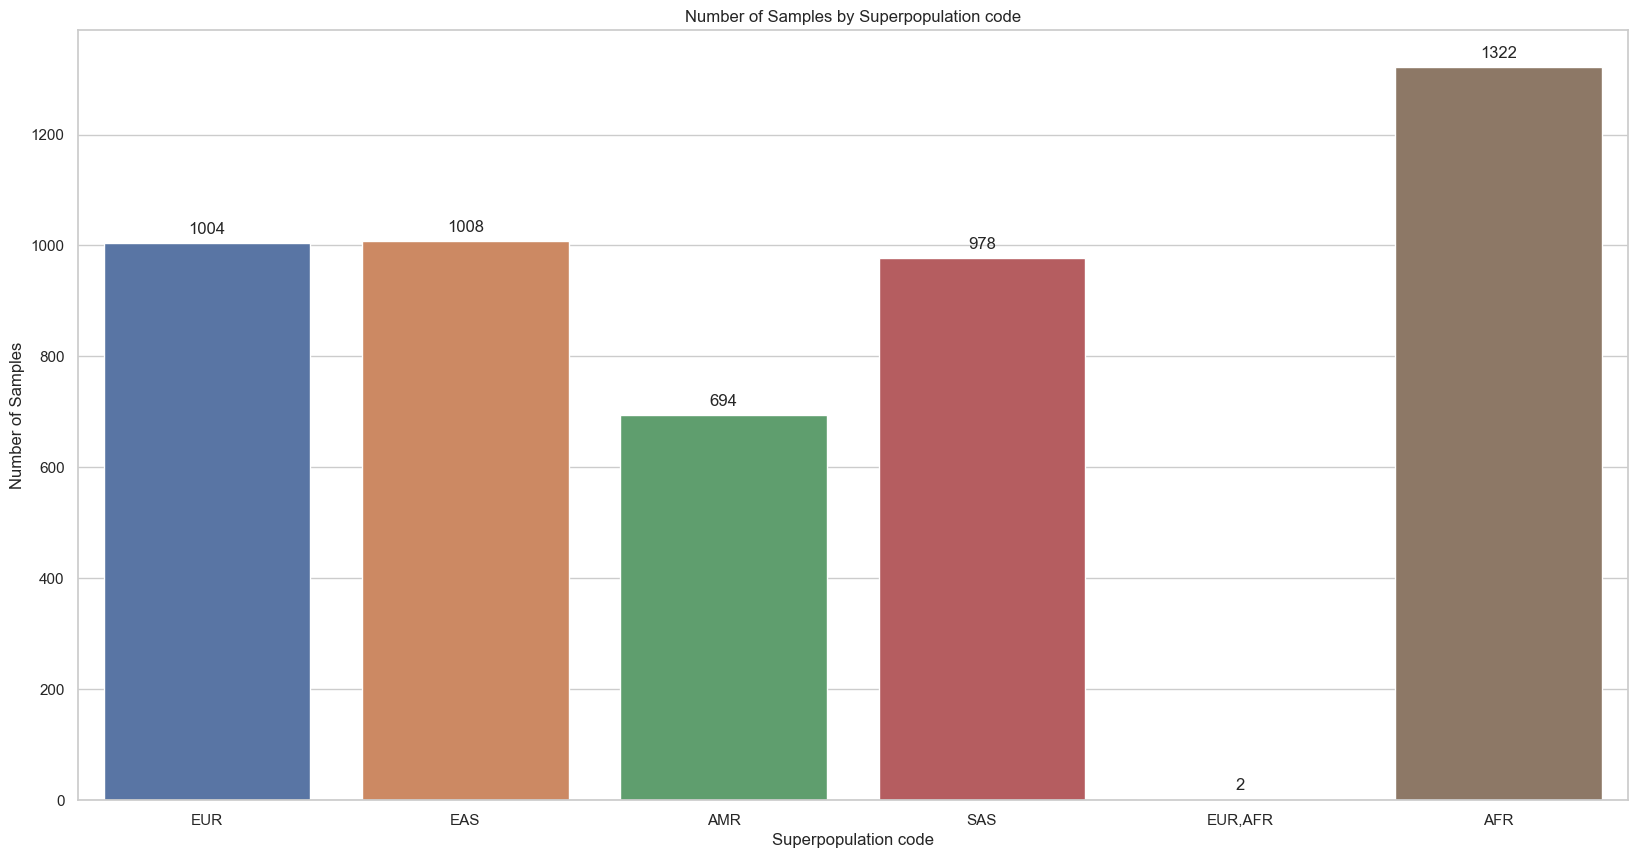

In [3]:
plot_number_of_samples("Superpopulation code")

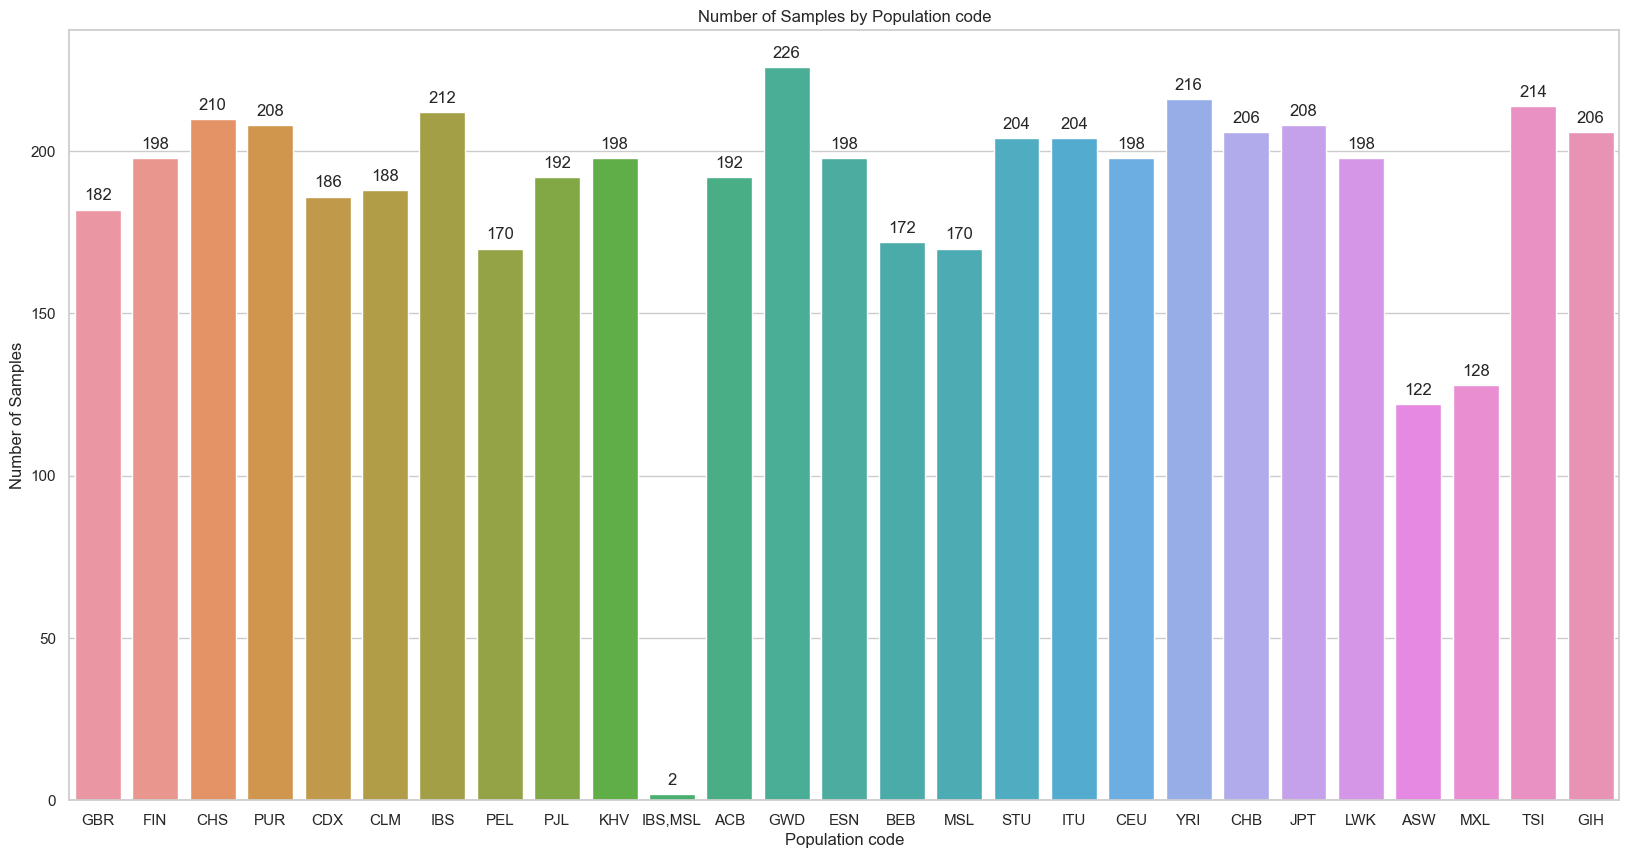

In [4]:
plot_number_of_samples("Population code")

In [5]:
genotypes_ids = get_relevant_columns(input_df=real_data_1000_genome, input_columns=[])
genotypes_ids.pop(0)
genotypes_ids.pop(0)
print(f"Number of SNPs: {len(genotypes_ids)}")

3

In [31]:
def print_frequency(current_df, target_column, title):
    rows = []
    for pop in current_df[target_column].unique():
        tmp_df = current_df[current_df[target_column] == pop]
        uniques, counts = np.unique(tmp_df[genotypes_ids], return_counts=True)
        tmp_percentages = dict(zip(uniques, 100 * counts / (len(tmp_df[genotypes_ids]) * len(genotypes_ids))))
        tmp_percentages = {key: f"{str(round(values, 2))}%" for key, values in tmp_percentages.items()}
        tmp_percentages["pop"] = pop
        rows.append(tmp_percentages)
    print("\033[91m \033[1m ", title, "\033[0m")
    print(pd.DataFrame(rows))

Allele Frequency

In [32]:
print_frequency(current_df=real_data_1000_genome, target_column=0, title="allele frequencies all")

   allele frequencies all 
        0       1   pop
0  85.18%  14.82%  Real


In [33]:
print_frequency(current_df=real_data_1000_genome, target_column="Superpopulation code",
                title="allele frequencies by Superpopulation code")

   allele frequencies by Superpopulation code 
        0       1      pop
0  87.24%  12.76%      EUR
1  84.48%  15.52%      EAS
2   85.8%   14.2%      AMR
3  85.95%  14.05%      SAS
4  88.22%  11.78%  EUR,AFR
5  83.26%  16.74%      AFR


In [34]:
print_frequency(current_df=real_data_1000_genome, target_column="Population code",
                title="allele frequencies by Population code")

   allele frequencies by Population code 
         0       1      pop
0   87.38%  12.62%      GBR
1   87.67%  12.33%      FIN
2   84.65%  15.35%      CHS
3   85.97%  14.03%      PUR
4   84.58%  15.42%      CDX
5   86.26%  13.74%      CLM
6   86.87%  13.13%      IBS
7   85.23%  14.77%      PEL
8   85.96%  14.04%      PJL
9   84.33%  15.67%      KHV
10  88.22%  11.78%  IBS,MSL
11  83.35%  16.65%      ACB
12  83.22%  16.78%      GWD
13   83.0%   17.0%      ESN
14  85.88%  14.12%      BEB
15  83.08%  16.92%      MSL
16  85.91%  14.09%      STU
17  85.98%  14.02%      ITU
18  87.24%  12.76%      CEU
19  83.16%  16.84%      YRI
20  84.38%  15.62%      CHB
21  84.45%  15.55%      JPT
22  83.28%  16.72%      LWK
23  84.06%  15.94%      ASW
24   85.6%   14.4%      MXL
25  87.07%  12.93%      TSI
26  85.99%  14.01%      GIH


PCA

In [35]:
n_components = 2
pca = PCA(n_components=n_components)
components = pca.fit_transform(real_data_1000_genome[genotypes_ids])

In [20]:
fig = px.scatter(components, x=0, y=1, color=real_data_1000_genome["Superpopulation code"],
                 title="PCA By Super Population")
fig.show()

In [21]:
fig = px.scatter(components, x=0, y=1, color=real_data_1000_genome["Population code"],
                 title="PCA By Population")
fig.show()